# Test Notebook

## Forward Pass

### Example Dataset

In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

### Simple Dense Model

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


### Weights and biases

Parameters after one iteration.

**Dense 1 (6 neurons, 4 inputs)**

In [3]:
dense1.info()

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[-0.09547076  0.00296255  0.00396586 -0.02120603]
 [-0.03557107  0.02770152 -0.09759252  0.06777244]
 [ 0.14171852 -0.08066567 -0.0144932   0.1107612 ]
 [-0.15196544 -0.08329129  0.0015183  -0.04347929]
 [ 0.01428677  0.05109281 -0.15917366 -0.07378313]
 [ 0.04622606  0.04405937 -0.04605335 -0.08073206]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[-0.35307882  0.13395178  0.96582481 -0.93752682 -1.27806445 -0.73222505]
 [-0.29524208  0.18049811  0.80649872 -0.88220925 -1.14318304 -0.66991569]
 [-0.31064751  0.16767413  0.54085088 -0.80218632 -0.2653108  -0.12123831]]



**Activation 1 (ReLU)**

In [4]:
activation1.info()

Inputs:
[[-0.35307882  0.13395178  0.96582481 -0.93752682 -1.27806445 -0.73222505]
 [-0.29524208  0.18049811  0.80649872 -0.88220925 -1.14318304 -0.66991569]
 [-0.31064751  0.16767413  0.54085088 -0.80218632 -0.2653108  -0.12123831]]

Outputs:
[[0.         0.13395178 0.96582481 0.         0.         0.        ]
 [0.         0.18049811 0.80649872 0.         0.         0.        ]
 [0.         0.16767413 0.54085088 0.         0.         0.        ]]



**Dense 2 (3 neurons, 6 inputs)**

In [5]:
dense2.info()

Inputs:
[[0.         0.13395178 0.96582481 0.         0.         0.        ]
 [0.         0.18049811 0.80649872 0.         0.         0.        ]
 [0.         0.16767413 0.54085088 0.         0.         0.        ]]

Weights:
[[ 0.10652297 -0.06700413  0.16849171 -0.02692517  0.03407567  0.0610652 ]
 [ 0.00524254 -0.23227619  0.01033201 -0.18676873 -0.19779252  0.098251  ]
 [-0.02239492  0.16990508  0.00983439  0.04429853 -0.05692386 -0.01818293]]

Biases:
[0. 0. 0.]

Outputs:
[[ 0.15375815 -0.02113489  0.03225738]
 [ 0.12379423 -0.03359266  0.03859897]
 [ 0.07989403 -0.03335863  0.03380762]]



**Activation 2 (Softmax)**

In [6]:
activation2.info()

Inputs:
[[ 0.15375815 -0.02113489  0.03225738]
 [ 0.12379423 -0.03359266  0.03859897]
 [ 0.07989403 -0.03335863  0.03380762]]

Outputs:
[[0.366954   0.30807506 0.32497093]
 [0.36065845 0.30813701 0.33120454]
 [0.35113784 0.31353976 0.3353224 ]]



### Loss

* loss1: CategoricalCrossentropy
* loss2: SparseCategoricalCrossentropy

In [7]:
loss1, loss2

(1.1012241690691644, 1.1012241690691644)

## Visualize datasets

### Spiral Data

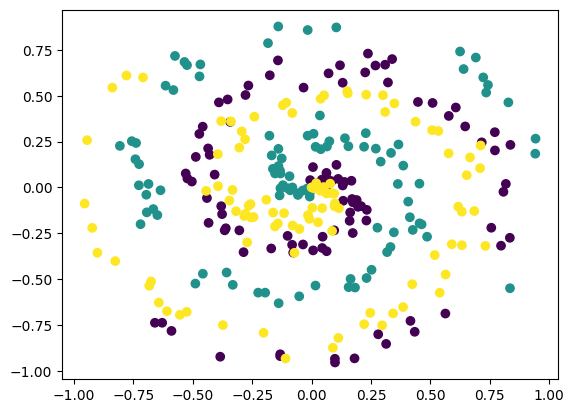

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Vertical Data

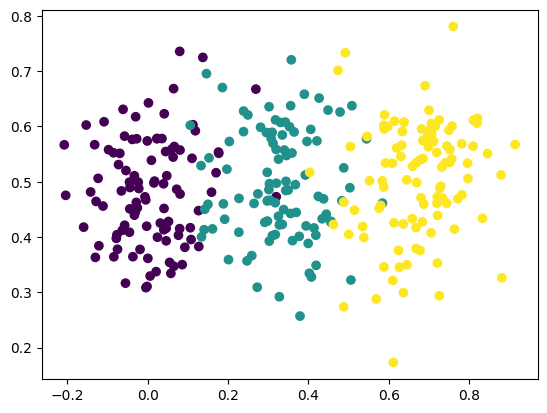

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Backward Pass

### Simple Dense Model
One forward and one backward.

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 1.0989033452258503
acc: 0.27666666666666667


### Gradients

Calculated gradients after one iteration.

**Dense 1 Weight Gradient**

In [11]:
dense1.dweights

array([[-0.00216845,  0.00191147],
       [-0.00065106, -0.00012913],
       [ 0.00209695, -0.00559267],
       [ 0.00045589,  0.00139085]])

**Dense 1 Bias Gradient**

In [12]:
dense1.dbiases

array([0.00433982, 0.00093007, 0.01001687, 0.00027256])

**Dense 2 Weight Gradient**

In [13]:
dense2.dweights

array([[ 0.00104859,  0.00056544, -0.00108649,  0.00174797],
       [ 0.00010453,  0.00065652,  0.00098184,  0.00091802],
       [-0.00115311, -0.00122196,  0.00010465, -0.00266599]])

**Dense 2 Bias Gradient**

In [14]:
dense2.dbiases

array([ 8.27171457e-05, -1.74988927e-04,  9.22717810e-05])

## Optimizing Parameters 

### SGD 

* Learning rate: 1.0
* Decay: 0.0
* Momentum: 0.0
* Epoch: 10000

In [15]:
from src.optimizers import SGD

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.277, loss: 1.105, lr: 1


epoch: 1000, acc: 0.490, loss: 0.998, lr: 1
epoch: 2000, acc: 0.600, loss: 0.896, lr: 1
epoch: 3000, acc: 0.580, loss: 0.861, lr: 1
epoch: 4000, acc: 0.583, loss: 0.864, lr: 1
epoch: 5000, acc: 0.630, loss: 0.820, lr: 1
epoch: 6000, acc: 0.550, loss: 1.032, lr: 1
epoch: 7000, acc: 0.680, loss: 0.698, lr: 1
epoch: 8000, acc: 0.663, loss: 0.681, lr: 1
epoch: 9000, acc: 0.687, loss: 0.658, lr: 1
epoch: 10000, acc: 0.690, loss: 0.697, lr: 1


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* Momentum: 0.0
* Epoch: 10000

In [16]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(decay=0.001)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.317, loss: 1.100, lr: 1
epoch: 1000, acc: 0.560, loss: 0.970, lr: 0.5002501250625312
epoch: 2000, acc: 0.620, loss: 0.864, lr: 0.33344448149383127
epoch: 3000, acc: 0.657, loss: 0.759, lr: 0.25006251562890724
epoch: 4000, acc: 0.730, loss: 0.660, lr: 0.2000400080016003
epoch: 5000, acc: 0.767, loss: 0.585, lr: 0.16669444907484582
epoch: 6000, acc: 0.813, loss: 0.530, lr: 0.1428775539362766
epoch: 7000, acc: 0.823, loss: 0.497, lr: 0.12501562695336915
epoch: 8000, acc: 0.840, loss: 0.473, lr: 0.11112345816201799
epoch: 9000, acc: 0.843, loss: 0.454, lr: 0.1000100010001
epoch: 10000, acc: 0.847, loss: 0.439, lr: 0.09091735612328393


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* **Momentum: 0.9**
* Epoch: 10000

In [17]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.320, loss: 1.097, lr: 1
epoch: 1000, acc: 0.870, loss: 0.317, lr: 0.5002501250625312
epoch: 2000, acc: 0.930, loss: 0.201, lr: 0.33344448149383127
epoch: 3000, acc: 0.937, loss: 0.166, lr: 0.25006251562890724
epoch: 4000, acc: 0.933, loss: 0.159, lr: 0.2000400080016003
epoch: 5000, acc: 0.933, loss: 0.155, lr: 0.16669444907484582
epoch: 6000, acc: 0.930, loss: 0.152, lr: 0.1428775539362766
epoch: 7000, acc: 0.933, loss: 0.150, lr: 0.12501562695336915
epoch: 8000, acc: 0.933, loss: 0.148, lr: 0.11112345816201799
epoch: 9000, acc: 0.933, loss: 0.146, lr: 0.1000100010001
epoch: 10000, acc: 0.933, loss: 0.145, lr: 0.09091735612328393


### AdaGrad 

* Learning rate: 1.0
* Decay: 0.0
* Epsilon: 1e-7
* Epoch: 10000

In [18]:
from src.optimizers import AdaGrad

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = AdaGrad()
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.320, loss: 1.100, lr: 1
epoch: 1000, acc: 0.657, loss: 0.718, lr: 1.0
epoch: 2000, acc: 0.723, loss: 0.598, lr: 1.0
epoch: 3000, acc: 0.730, loss: 0.540, lr: 1.0
epoch: 4000, acc: 0.740, loss: 0.507, lr: 1.0
epoch: 5000, acc: 0.813, loss: 0.440, lr: 1.0
epoch: 6000, acc: 0.827, loss: 0.397, lr: 1.0
epoch: 7000, acc: 0.843, loss: 0.364, lr: 1.0
epoch: 8000, acc: 0.853, loss: 0.338, lr: 1.0
epoch: 9000, acc: 0.880, loss: 0.311, lr: 1.0
epoch: 10000, acc: 0.887, loss: 0.292, lr: 1.0


### RMSProp 

* Learning rate: 0.001
* **Decay: 1e-4**
* Epsilon: 1e-7
* Rho: 0.9
* Epoch: 10000

In [19]:
from src.optimizers import RMSProp

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = RMSProp(decay=1e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.303, loss: 1.098, lr: 0.001
epoch: 1000, acc: 0.570, loss: 0.924, lr: 0.0009091735612328393
epoch: 2000, acc: 0.700, loss: 0.750, lr: 0.0008334027835652972
epoch: 3000, acc: 0.743, loss: 0.618, lr: 0.0007692899453804139
epoch: 4000, acc: 0.797, loss: 0.510, lr: 0.0007143367383384526
epoch: 5000, acc: 0.837, loss: 0.431, lr: 0.0006667111140742716
epoch: 6000, acc: 0.867, loss: 0.374, lr: 0.0006250390649415589
epoch: 7000, acc: 0.887, loss: 0.332, lr: 0.0005882698982293077
epoch: 8000, acc: 0.890, loss: 0.295, lr: 0.0005555864214678594
epoch: 9000, acc: 0.910, loss: 0.268, lr: 0.0005263434917627244
epoch: 10000, acc: 0.917, loss: 0.243, lr: 0.0005000250012500625


### Adam 

* Learning rate: 0.001
* Decay: 0.0
* Epsilon: 1e-7
* Beta 1: 0.9
* Beta 2: 0.999
* Epoch: 10000

In [20]:
from src.optimizers import Adam

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam()
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.350, loss: 1.098, lr: 0.001
epoch: 1000, acc: 0.570, loss: 0.917, lr: 0.001
epoch: 2000, acc: 0.763, loss: 0.654, lr: 0.001
epoch: 3000, acc: 0.833, loss: 0.491, lr: 0.001
epoch: 4000, acc: 0.850, loss: 0.393, lr: 0.001
epoch: 5000, acc: 0.870, loss: 0.331, lr: 0.001
epoch: 6000, acc: 0.903, loss: 0.275, lr: 0.001
epoch: 7000, acc: 0.917, loss: 0.240, lr: 0.001
epoch: 8000, acc: 0.927, loss: 0.213, lr: 0.001
epoch: 9000, acc: 0.930, loss: 0.193, lr: 0.001
epoch: 10000, acc: 0.933, loss: 0.176, lr: 0.001
